In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import ast
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import seaborn as sns
import mysql.connector
%matplotlib inline

In [386]:
remote = mysql.connector.connect(
    host = "database-1.cvkugmey24at.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "root",
    password = "bnmqaz010203",
    database = "eda_project"
)
cur = remote.cursor(buffered=True)

In [387]:
cur.execute("SELECT * FROM movie")
result = cur.fetchall()
columns = [desc[0] for desc in cur.description]
raw_data = pd.DataFrame(result, columns=columns)
raw_data.head()

,id,name,year,box_office_year,month,sale,audience,screen,screen_number,genre
0,0,명량,2014,2014,7,2147483647,17613682,1587,188611,"['사극', '액션']"
1,1,겨울왕국,2014,2014,1,2147483647,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬',"
2,2,인터스텔라,2014,2014,11,2147483647,10105247,1410,166218,['SF']
3,3,해적: 바다로 간 산적,2014,2014,8,2147483647,8666046,910,133350,['어드벤처']
4,4,수상한 그녀,2014,2014,1,2147483647,8657982,1027,136975,['드라마']


In [388]:
cur.close()

True

In [389]:
remote.close()

In [390]:
print(raw_data.columns.tolist())

['id', 'name', 'year', 'box_office_year', 'month', 'sale', 'audience', 'screen', 'screen_number', 'genre']


In [391]:
raw_data.rename(columns={"id": "ID", 
    "name": "Name", 
    "year" : "Year",
    "box_office_year": "Years", 
    "month": "Month", 
    "sale": "Sale", 
    "audience": "Audience", 
    "screen": "Screen", 
    "screen_number": "ScreenNum", 
    "genre": "Genre"}, inplace=True)
raw_data.head()

,ID,Name,Year,Years,Month,Sale,Audience,Screen,ScreenNum,Genre
0,0,명량,2014,2014,7,2147483647,17613682,1587,188611,"['사극', '액션']"
1,1,겨울왕국,2014,2014,1,2147483647,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬',"
2,2,인터스텔라,2014,2014,11,2147483647,10105247,1410,166218,['SF']
3,3,해적: 바다로 간 산적,2014,2014,8,2147483647,8666046,910,133350,['어드벤처']
4,4,수상한 그녀,2014,2014,1,2147483647,8657982,1027,136975,['드라마']


In [392]:
years = raw_data["Years"].unique()
years

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [393]:
befOTT = raw_data[(raw_data["Years"] >= 2014) & (raw_data["Years"] <= 2016)]
befOTT.head()

,ID,Name,Year,Years,Month,Sale,Audience,Screen,ScreenNum,Genre
0,0,명량,2014,2014,7,2147483647,17613682,1587,188611,"['사극', '액션']"
1,1,겨울왕국,2014,2014,1,2147483647,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬',"
2,2,인터스텔라,2014,2014,11,2147483647,10105247,1410,166218,['SF']
3,3,해적: 바다로 간 산적,2014,2014,8,2147483647,8666046,910,133350,['어드벤처']
4,4,수상한 그녀,2014,2014,1,2147483647,8657982,1027,136975,['드라마']


In [394]:
aftOTT = raw_data[(raw_data["Years"] >= 2017) & (raw_data["Years"] <= 2019)]
aftOTT.head()

,ID,Name,Year,Years,Month,Sale,Audience,Screen,ScreenNum,Genre
150,150,택시운전사,2017,2017,8,2147483647,12186327,1906,184075,['드라마']
151,151,신과함께-죄와 벌,2017,2017,12,2147483647,8539495,1912,91301,"['판타지', '드라마']"
152,152,공조,2017,2017,1,2147483647,7817618,1392,142989,['액션']
153,153,스파이더맨: 홈 커밍,2017,2017,7,2147483647,7258678,1965,164448,"['액션', '어드벤처', 'SF']"
154,154,범죄도시,2017,2017,10,2147483647,6879841,1315,149334,"['범죄', '액션']"


In [395]:
aftCovid = raw_data[(raw_data["Years"] >= 2020) & (raw_data["Years"] <= 2023)]
aftCovid.head()

,ID,Name,Year,Years,Month,Sale,Audience,Screen,ScreenNum,Genre
300,300,남산의 부장들,2020,2020,1,2147483647,4750345,1659,140051,['드라마']
301,301,다만 악에서 구하소서,2020,2020,8,2147483647,4357803,1998,193842,"['범죄', '액션']"
302,302,반도,2020,2020,7,2147483647,3812250,2575,199048,"['액션', '드라마']"
303,303,히트맨,2020,2020,1,2147483647,2406232,1122,87782,"['코미디', '액션']"
304,304,테넷,2020,2020,8,2147483647,1992214,2228,164758,"['액션', 'SF']"


In [396]:
befOTT.tail()

,ID,Name,Year,Years,Month,Sale,Audience,Screen,ScreenNum,Genre
145,145,스타트렉 비욘드,2016,2016,8,2147483647,1157156,716,38199,"['액션', 'SF']"
146,146,미씽: 사라진 여자,2016,2016,11,2147483647,1153109,790,40617,['미스터리']
147,147,"당신, 거기 있어줄래요",2016,2016,12,2147483647,1124815,767,39181,"['판타지', '드라마']"
148,148,라이트 아웃,2016,2016,8,2147483647,1111284,659,34444,['공포(호러)']
149,149,오빠생각,2016,2016,1,2147483647,1069864,855,44801,"['드라마', '전쟁']"


In [397]:
genres = ['미스터리', '공포(호러)', '액션', '범죄', '판타지', '드라마', 'SF', '다큐멘터리', '전쟁','코미디', '뮤지컬', '애니메이션', '스릴러', '어드벤처', '사극', '멜로/로맨스', '기타']

In [398]:
genre_counts = {genre: befOTT["Genre"].str.contains(genre).sum() for genre in genres}
num_of_genre_bef_ott = pd.DataFrame(list(genre_counts.items()), columns=["Genre", "Number"])
num_of_genre_bef_ott["Number"] = num_of_genre_bef_ott["Number"] / 3
num_of_genre_bef_ott

/tmp/ipykernel_10386/4097829986.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_counts = {genre: befOTT["Genre"].str.contains(genre).sum() for genre in genres}


,Genre,Number
0,미스터리,1.666667
1,공포(호러),0.000000
2,액션,21.333333
3,범죄,6.666667
4,판타지,5.000000
5,드라마,19.666667
6,SF,6.333333
7,다큐멘터리,0.333333
8,전쟁,1.333333
9,코미디,7.666667


In [399]:
genre_counts = {genre: aftOTT["Genre"].str.contains(genre).sum() for genre in genres}
num_of_genre_aft_ott = pd.DataFrame(list(genre_counts.items()), columns=["Genre", "Number"])
num_of_genre_aft_ott["Number"] = num_of_genre_aft_ottsum["Number"] / 3
num_of_genre_aft_ott

/tmp/ipykernel_10386/1802977680.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_counts = {genre: aftOTT["Genre"].str.contains(genre).sum() for genre in genres}


,Genre,Number
0,미스터리,2.000000
1,공포(호러),0.000000
2,액션,21.666667
3,범죄,8.666667
4,판타지,5.333333
5,드라마,17.000000
6,SF,7.666667
7,다큐멘터리,0.333333
8,전쟁,0.666667
9,코미디,9.333333


In [400]:
genre_counts = {genre: aftCovid["Genre"].str.contains(genre).sum() for genre in genres}
num_of_genre_aft_cov = pd.DataFrame(list(genre_counts.items()), columns=["Genre", "Number"])
num_of_genre_aft_cov["Number"] = num_of_genre_aft_cov["Number"] / 4
num_of_genre_aft_cov

/tmp/ipykernel_10386/3754103274.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_counts = {genre: aftCovid["Genre"].str.contains(genre).sum() for genre in genres}


,Genre,Number
0,미스터리,2.75
1,공포(호러),0.00
2,액션,20.50
3,범죄,5.00
4,판타지,3.75
5,드라마,16.00
6,SF,3.75
7,다큐멘터리,0.00
8,전쟁,0.25
9,코미디,7.25


In [401]:
num_genre = num_of_genre_bef_ott
num_genre.rename(columns={"Genre":"Genre", "Number":"Before OTT"}, inplace=True)
num_genre["After OTT"] = num_of_genre_aft_ott["Number"]
num_genre["After COV"] = num_of_genre_aft_cov["Number"]
num_genre

,Genre,Before OTT,After OTT,After COV
0,미스터리,1.666667,2.000000,2.75
1,공포(호러),0.000000,0.000000,0.00
2,액션,21.333333,21.666667,20.50
3,범죄,6.666667,8.666667,5.00
4,판타지,5.000000,5.333333,3.75
5,드라마,19.666667,17.000000,16.00
6,SF,6.333333,7.666667,3.75
7,다큐멘터리,0.333333,0.333333,0.00
8,전쟁,1.333333,0.666667,0.25
9,코미디,7.666667,9.333333,7.25


In [402]:
df_melted = num_genre.melt(id_vars=["Genre"], var_name="Time Period", value_name="Average")
df_melted

,Genre,Time Period,Average
0,미스터리,Before OTT,1.666667
1,공포(호러),Before OTT,0.000000
2,액션,Before OTT,21.333333
3,범죄,Before OTT,6.666667
4,판타지,Before OTT,5.000000
5,드라마,Before OTT,19.666667
6,SF,Before OTT,6.333333
7,다큐멘터리,Before OTT,0.333333
8,전쟁,Before OTT,1.333333
9,코미디,Before OTT,7.666667


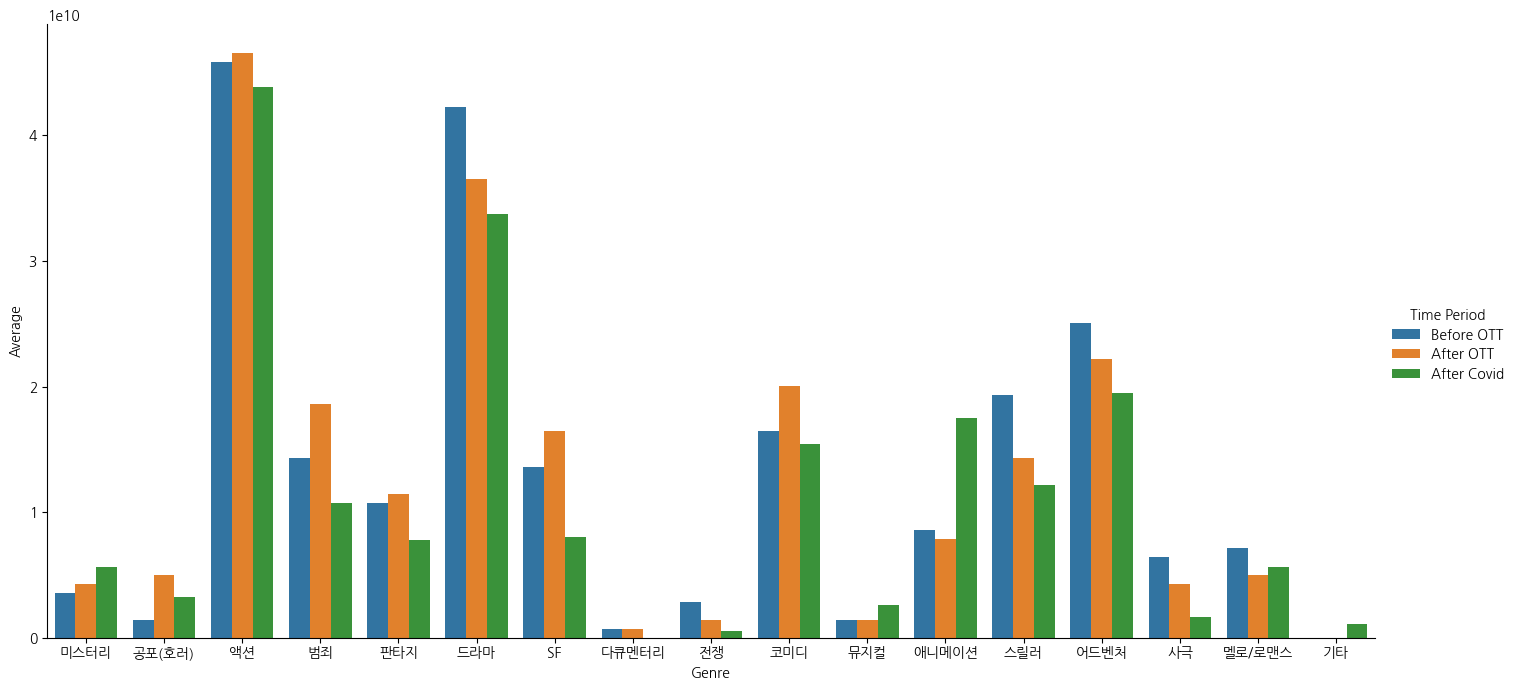

In [434]:
sns.catplot(x="Genre", y="Average", hue="Time Period", data=df_melted, kind="bar", legend=True, height=7, aspect=2)
plt.savefig('bef_aft_each_comparison_bar.png')
plt.show()

In [479]:
bef_ott_avg = []

mys = 0
hor = 0
act = 0
cri = 0
fan = 0
dra = 0
sci = 0
doc = 0
war = 0
com = 0
mus = 0
ani = 0
thr = 0
adv = 0
his = 0
mel = 0
oth = 0

for idx, data in befOTT.iterrows():

    if "미스터리" in data["Genre"]:
        mys += data["Sale"]
    if "공포(호러)" in data["Genre"]:
        hor += data["Sale"]
    if "액션" in data["Genre"]:
        act += data["Sale"]
    if "범죄" in data["Genre"]:
        cri += data["Sale"]
    if "판타지" in data["Genre"]:
        fan += data["Sale"]
    if "드라마" in data["Genre"]:
        dra += data["Sale"]
    if "SF" in data["Genre"]:
        sci += data["Sale"]
    if "다큐멘터리" in data["Genre"]:
        doc += data["Sale"]
    if "전쟁" in data["Genre"]:
        war += data["Sale"]
    if "코미디" in data["Genre"]:
        com += data["Sale"]
    if "뮤지컬" in data["Genre"]:
        mus += data["Sale"]
    if "애니메이션" in data["Genre"]:
        ani += data["Sale"]
    if "스릴러" in data["Genre"]:
        thr += data["Sale"]
    if "어드벤처" in data["Genre"]:
        adv += data["Sale"]
    if "사극" in data["Genre"]:
        his += data["Sale"]
    if "멜로/로맨스" in data["Genre"]:
        mel += data["Sale"]
    if "기타" in data["Genre"]:
        oth += data["Sale"]

bef_ott_avg.append(mys/3)
bef_ott_avg.append(hor/3)
bef_ott_avg.append(act/3)
bef_ott_avg.append(cri/3)
bef_ott_avg.append(fan/3)
bef_ott_avg.append(dra/3)
bef_ott_avg.append(sci/3)
bef_ott_avg.append(doc/3)
bef_ott_avg.append(war/3)
bef_ott_avg.append(com/3)
bef_ott_avg.append(mus/3)
bef_ott_avg.append(ani/3)
bef_ott_avg.append(thr/3)
bef_ott_avg.append(adv/3)
bef_ott_avg.append(his/3)
bef_ott_avg.append(mel/3)
bef_ott_avg.append(oth/3)

len(bef_ott_avg)

17

In [480]:
bef_ott_avg

[3579139411.6666665,
 1431655764.6666667,
 45812984469.333336,
 14316557646.666666,
 10737418235.0,
 42233845057.666664,
 13600729764.333334,
 715827882.3333334,
 2863311529.3333335,
 16464041293.666666,
 1431655764.6666667,
 8589934588.0,
 19327352823.0,
 25053975881.666668,
 6442450941.0,
 7158278823.333333,
 0.0]

In [481]:
aft_ott_avg = []

mys = 0
hor = 0
act = 0
cri = 0
fan = 0
dra = 0
sci = 0
doc = 0
war = 0
com = 0
mus = 0
ani = 0
thr = 0
adv = 0
his = 0
mel = 0
oth = 0

for idx, data in aftOTT.iterrows():

    if "미스터리" in data["Genre"]:
        mys += data["Sale"]
    if "공포(호러)" in data["Genre"]:
        hor += data["Sale"]
    if "액션" in data["Genre"]:
        act += data["Sale"]
    if "범죄" in data["Genre"]:
        cri += data["Sale"]
    if "판타지" in data["Genre"]:
        fan += data["Sale"]
    if "드라마" in data["Genre"]:
        dra += data["Sale"]
    if "SF" in data["Genre"]:
        sci += data["Sale"]
    if "다큐멘터리" in data["Genre"]:
        doc += data["Sale"]
    if "전쟁" in data["Genre"]:
        war += data["Sale"]
    if "코미디" in data["Genre"]:
        com += data["Sale"]
    if "뮤지컬" in data["Genre"]:
        mus += data["Sale"]
    if "애니메이션" in data["Genre"]:
        ani += data["Sale"]
    if "스릴러" in data["Genre"]:
        thr += data["Sale"]
    if "어드벤처" in data["Genre"]:
        adv += data["Sale"]
    if "사극" in data["Genre"]:
        his += data["Sale"]
    if "멜로/로맨스" in data["Genre"]:
        mel += data["Sale"]
    if "기타" in data["Genre"]:
        oth += data["Sale"]

aft_ott_avg.append(mys/3)
aft_ott_avg.append(hor/3)
aft_ott_avg.append(act/3)
aft_ott_avg.append(cri/3)
aft_ott_avg.append(fan/3)
aft_ott_avg.append(dra/3)
aft_ott_avg.append(sci/3)
aft_ott_avg.append(doc/3)
aft_ott_avg.append(war/3)
aft_ott_avg.append(com/3)
aft_ott_avg.append(mus/3)
aft_ott_avg.append(ani/3)
aft_ott_avg.append(thr/3)
aft_ott_avg.append(adv/3)
aft_ott_avg.append(his/3)
aft_ott_avg.append(mel/3)
aft_ott_avg.append(oth/3)

len(aft_ott_avg)

17

In [482]:
aft_ott_avg

[4294967294.0,
 5010795176.333333,
 46528812351.666664,
 18611524940.666668,
 11453246117.333334,
 36507221999.0,
 16464041293.666666,
 715827882.3333334,
 1431655764.6666667,
 20043180705.333332,
 1431655764.6666667,
 7874106705.666667,
 14316557646.666666,
 22190664352.333332,
 4294967294.0,
 5010795176.333333,
 0.0]

In [483]:
aft_cov_avg = []

mys = 0
hor = 0
act = 0
cri = 0
fan = 0
dra = 0
sci = 0
doc = 0
war = 0
com = 0
mus = 0
ani = 0
thr = 0
adv = 0
his = 0
mel = 0
oth = 0

for idx, data in aftCovid.iterrows():

    if "미스터리" in data["Genre"]:
        mys += data["Sale"]
    if "공포(호러)" in data["Genre"]:
        hor += data["Sale"]
    if "액션" in data["Genre"]:
        act += data["Sale"]
    if "범죄" in data["Genre"]:
        cri += data["Sale"]
    if "판타지" in data["Genre"]:
        fan += data["Sale"]
    if "드라마" in data["Genre"]:
        dra += data["Sale"]
    if "SF" in data["Genre"]:
        sci += data["Sale"]
    if "다큐멘터리" in data["Genre"]:
        doc += data["Sale"]
    if "전쟁" in data["Genre"]:
        war += data["Sale"]
    if "코미디" in data["Genre"]:
        com += data["Sale"]
    if "뮤지컬" in data["Genre"]:
        mus += data["Sale"]
    if "애니메이션" in data["Genre"]:
        ani += data["Sale"]
    if "스릴러" in data["Genre"]:
        thr += data["Sale"]
    if "어드벤처" in data["Genre"]:
        adv += data["Sale"]
    if "사극" in data["Genre"]:
        his += data["Sale"]
    if "멜로/로맨스" in data["Genre"]:
        mel += data["Sale"]
    if "기타" in data["Genre"]:
        oth += data["Sale"]

aft_cov_avg.append(mys/4)
aft_cov_avg.append(hor/4)
aft_cov_avg.append(act/4)
aft_cov_avg.append(cri/4)
aft_cov_avg.append(fan/4)
aft_cov_avg.append(dra/4)
aft_cov_avg.append(sci/4)
aft_cov_avg.append(doc/4)
aft_cov_avg.append(war/4)
aft_cov_avg.append(com/4)
aft_cov_avg.append(mus/4)
aft_cov_avg.append(ani/4)
aft_cov_avg.append(thr/4)
aft_cov_avg.append(adv/4)
aft_cov_avg.append(his/4)
aft_cov_avg.append(mel/4)
aft_cov_avg.append(oth/4)

len(aft_cov_avg)

17

In [484]:
aft_cov_avg

[5633984103.25,
 3221225470.5,
 43835376565.0,
 10737418235.0,
 7817545434.5,
 33741367007.25,
 7996950922.0,
 0.0,
 536870911.75,
 15394171754.75,
 2621796539.5,
 17474010653.25,
 12125378799.25,
 19505798487.75,
 1610612735.25,
 5643155310.75,
 1073741823.5]

In [485]:
data = {"Genre":genres, "Before OTT":bef_ott_avg}
sale_bef_ott = pd.DataFrame(data)
sale_bef_ott

,Genre,Before OTT
0,미스터리,3.579139e+09
1,공포(호러),1.431656e+09
2,액션,4.581298e+10
3,범죄,1.431656e+10
4,판타지,1.073742e+10
5,드라마,4.223385e+10
6,SF,1.360073e+10
7,다큐멘터리,7.158279e+08
8,전쟁,2.863312e+09
9,코미디,1.646404e+10


In [486]:
sale_genre = sale_bef_ott
sale_genre["After OTT"] = aft_ott_avg
sale_genre["After Covid"] = aft_cov_avg
sale_genre

,Genre,Before OTT,After OTT,After Covid
0,미스터리,3.579139e+09,4.294967e+09,5.633984e+09
1,공포(호러),1.431656e+09,5.010795e+09,3.221225e+09
2,액션,4.581298e+10,4.652881e+10,4.383538e+10
3,범죄,1.431656e+10,1.861152e+10,1.073742e+10
4,판타지,1.073742e+10,1.145325e+10,7.817545e+09
5,드라마,4.223385e+10,3.650722e+10,3.374137e+10
6,SF,1.360073e+10,1.646404e+10,7.996951e+09
7,다큐멘터리,7.158279e+08,7.158279e+08,0.000000e+00
8,전쟁,2.863312e+09,1.431656e+09,5.368709e+08
9,코미디,1.646404e+10,2.004318e+10,1.539417e+10


In [487]:
df_melted =sale_genre.melt(id_vars=["Genre"], var_name="Time Period", value_name="Average")
df_melted

,Genre,Time Period,Average
0,미스터리,Before OTT,3.579139e+09
1,공포(호러),Before OTT,1.431656e+09
2,액션,Before OTT,4.581298e+10
3,범죄,Before OTT,1.431656e+10
4,판타지,Before OTT,1.073742e+10
5,드라마,Before OTT,4.223385e+10
6,SF,Before OTT,1.360073e+10
7,다큐멘터리,Before OTT,7.158279e+08
8,전쟁,Before OTT,2.863312e+09
9,코미디,Before OTT,1.646404e+10


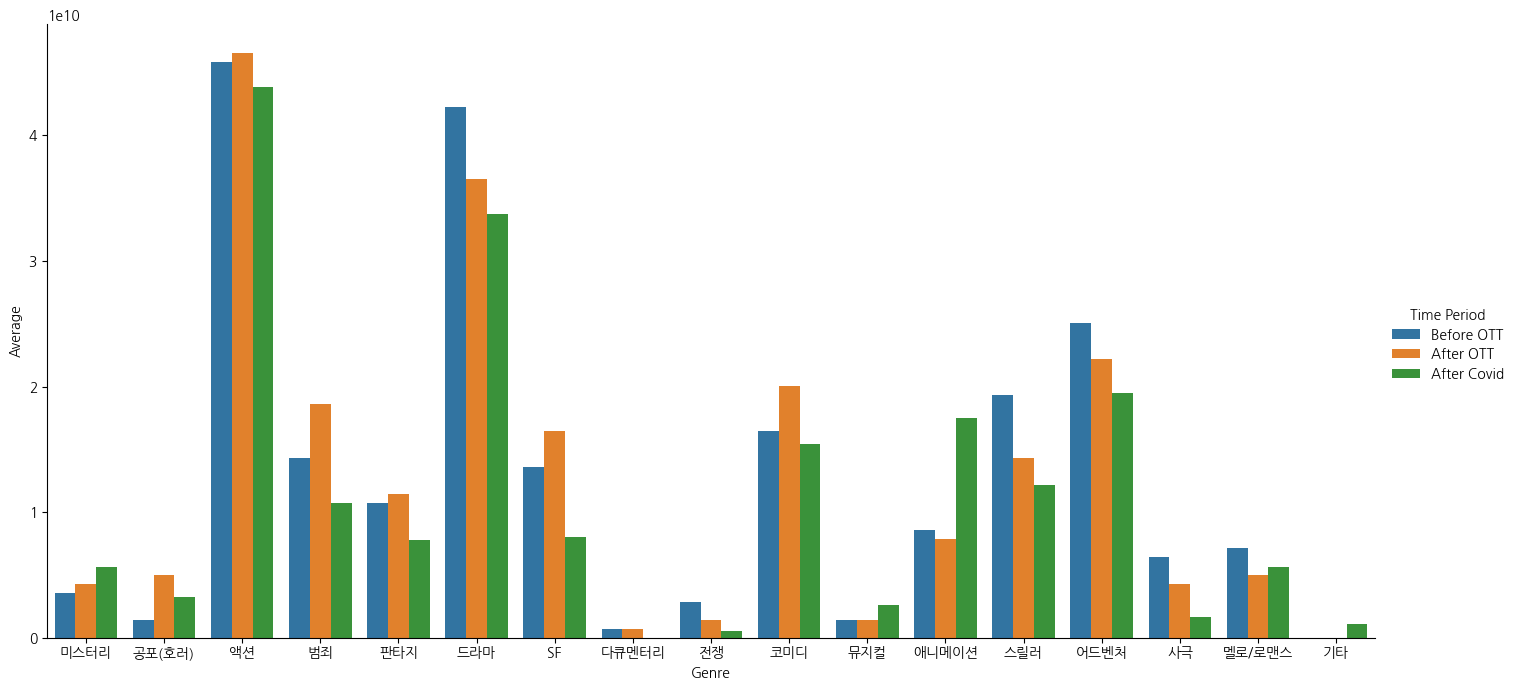

In [488]:
sns.catplot(x="Genre", y="Average", hue="Time Period", data=df_melted, kind="bar", legend=True, height=7, aspect=2)
plt.savefig('bef_aft_each_comparison_sale_bar.png')
plt.show()

In [489]:
bef_ott_avg = []

mys = 0
hor = 0
act = 0
cri = 0
fan = 0
dra = 0
sci = 0
doc = 0
war = 0
com = 0
mus = 0
ani = 0
thr = 0
adv = 0
his = 0
mel = 0
oth = 0

for idx, data in befOTT.iterrows():

    if "미스터리" in data["Genre"]:
        mys += data["Audience"]
    if "공포(호러)" in data["Genre"]:
        hor += data["Audience"]
    if "액션" in data["Genre"]:
        act += data["Audience"]
    if "범죄" in data["Genre"]:
        cri += data["Audience"]
    if "판타지" in data["Genre"]:
        fan += data["Audience"]
    if "드라마" in data["Genre"]:
        dra += data["Audience"]
    if "SF" in data["Genre"]:
        sci += data["Audience"]
    if "다큐멘터리" in data["Genre"]:
        doc += data["Audience"]
    if "전쟁" in data["Genre"]:
        war += data["Audience"]
    if "코미디" in data["Genre"]:
        com += data["Audience"]
    if "뮤지컬" in data["Genre"]:
        mus += data["Audience"]
    if "애니메이션" in data["Genre"]:
        ani += data["Audience"]
    if "스릴러" in data["Genre"]:
        thr += data["Audience"]
    if "어드벤처" in data["Genre"]:
        adv += data["Audience"]
    if "사극" in data["Genre"]:
        his += data["Audience"]
    if "멜로/로맨스" in data["Genre"]:
        mel += data["Audience"]
    if "기타" in data["Genre"]:
        oth += data["Audience"]

bef_ott_avg.append(mys/3)
bef_ott_avg.append(hor/3)
bef_ott_avg.append(act/3)
bef_ott_avg.append(cri/3)
bef_ott_avg.append(fan/3)
bef_ott_avg.append(dra/3)
bef_ott_avg.append(sci/3)
bef_ott_avg.append(doc/3)
bef_ott_avg.append(war/3)
bef_ott_avg.append(com/3)
bef_ott_avg.append(mus/3)
bef_ott_avg.append(ani/3)
bef_ott_avg.append(thr/3)
bef_ott_avg.append(adv/3)
bef_ott_avg.append(his/3)
bef_ott_avg.append(mel/3)
bef_ott_avg.append(oth/3)

len(bef_ott_avg)

17

In [490]:
bef_ott_avg

[6335243.333333333,
 1013296.3333333334,
 82716089.33333333,
 19286991.666666668,
 16667458.333333334,
 65023620.0,
 27947869.0,
 1282126.0,
 3691579.0,
 24652773.333333332,
 4227069.666666667,
 13770279.0,
 31299333.333333332,
 41977234.0,
 15567299.0,
 6625896.333333333,
 0.0]

In [491]:
aft_ott_avg = []

mys = 0
hor = 0
act = 0
cri = 0
fan = 0
dra = 0
sci = 0
doc = 0
war = 0
com = 0
mus = 0
ani = 0
thr = 0
adv = 0
his = 0
mel = 0
oth = 0

for idx, data in aftOTT.iterrows():

    if "미스터리" in data["Genre"]:
        mys += data["Audience"]
    if "공포(호러)" in data["Genre"]:
        hor += data["Audience"]
    if "액션" in data["Genre"]:
        act += data["Audience"]
    if "범죄" in data["Genre"]:
        cri += data["Audience"]
    if "판타지" in data["Genre"]:
        fan += data["Audience"]
    if "드라마" in data["Genre"]:
        dra += data["Audience"]
    if "SF" in data["Genre"]:
        sci += data["Audience"]
    if "다큐멘터리" in data["Genre"]:
        doc += data["Audience"]
    if "전쟁" in data["Genre"]:
        war += data["Audience"]
    if "코미디" in data["Genre"]:
        com += data["Audience"]
    if "뮤지컬" in data["Genre"]:
        mus += data["Audience"]
    if "애니메이션" in data["Genre"]:
        ani += data["Audience"]
    if "스릴러" in data["Genre"]:
        thr += data["Audience"]
    if "어드벤처" in data["Genre"]:
        adv += data["Audience"]
    if "사극" in data["Genre"]:
        his += data["Audience"]
    if "멜로/로맨스" in data["Genre"]:
        mel += data["Audience"]
    if "기타" in data["Genre"]:
        oth += data["Audience"]

aft_ott_avg.append(mys/3)
aft_ott_avg.append(hor/3)
aft_ott_avg.append(act/3)
aft_ott_avg.append(cri/3)
aft_ott_avg.append(fan/3)
aft_ott_avg.append(dra/3)
aft_ott_avg.append(sci/3)
aft_ott_avg.append(doc/3)
aft_ott_avg.append(war/3)
aft_ott_avg.append(com/3)
aft_ott_avg.append(mus/3)
aft_ott_avg.append(ani/3)
aft_ott_avg.append(thr/3)
aft_ott_avg.append(adv/3)
aft_ott_avg.append(his/3)
aft_ott_avg.append(mel/3)
aft_ott_avg.append(oth/3)

len(aft_ott_avg)

17

In [492]:
aft_ott_avg

[4035402.6666666665,
 4340343.666666667,
 80152738.0,
 25093524.333333332,
 26732440.666666668,
 62964389.666666664,
 33392300.0,
 618383.0,
 1309869.3333333333,
 31722060.333333332,
 2477404.0,
 13138115.333333334,
 16589792.0,
 40646344.0,
 6735903.666666667,
 6773778.666666667,
 0.0]

In [493]:
aft_cov_avg = []

mys = 0
hor = 0
act = 0
cri = 0
fan = 0
dra = 0
sci = 0
doc = 0
war = 0
com = 0
mus = 0
ani = 0
thr = 0
adv = 0
his = 0
mel = 0
oth = 0

for idx, data in aftCovid.iterrows():

    if "미스터리" in data["Genre"]:
        mys += data["Audience"]
    if "공포(호러)" in data["Genre"]:
        hor += data["Audience"]
    if "액션" in data["Genre"]:
        act += data["Audience"]
    if "범죄" in data["Genre"]:
        cri += data["Audience"]
    if "판타지" in data["Genre"]:
        fan += data["Audience"]
    if "드라마" in data["Genre"]:
        dra += data["Audience"]
    if "SF" in data["Genre"]:
        sci += data["Audience"]
    if "다큐멘터리" in data["Genre"]:
        doc += data["Audience"]
    if "전쟁" in data["Genre"]:
        war += data["Audience"]
    if "코미디" in data["Genre"]:
        com += data["Audience"]
    if "뮤지컬" in data["Genre"]:
        mus += data["Audience"]
    if "애니메이션" in data["Genre"]:
        ani += data["Audience"]
    if "스릴러" in data["Genre"]:
        thr += data["Audience"]
    if "어드벤처" in data["Genre"]:
        adv += data["Audience"]
    if "사극" in data["Genre"]:
        his += data["Audience"]
    if "멜로/로맨스" in data["Genre"]:
        mel += data["Audience"]
    if "기타" in data["Genre"]:
        oth += data["Audience"]

aft_cov_avg.append(mys/4)
aft_cov_avg.append(hor/4)
aft_cov_avg.append(act/4)
aft_cov_avg.append(cri/4)
aft_cov_avg.append(fan/4)
aft_cov_avg.append(dra/4)
aft_cov_avg.append(sci/4)
aft_cov_avg.append(doc/4)
aft_cov_avg.append(war/4)
aft_cov_avg.append(com/4)
aft_cov_avg.append(mus/4)
aft_cov_avg.append(ani/4)
aft_cov_avg.append(thr/4)
aft_cov_avg.append(adv/4)
aft_cov_avg.append(his/4)
aft_cov_avg.append(mel/4)
aft_cov_avg.append(oth/4)

len(aft_cov_avg)

17

In [494]:
aft_cov_avg

[1944409.5,
 890090.25,
 42407754.25,
 10010749.5,
 5203279.0,
 23207001.0,
 7914993.5,
 0.0,
 219254.25,
 9434816.25,
 1350235.5,
 10438189.75,
 8350654.0,
 15798023.25,
 1203923.75,
 1722576.5,
 1108686.0]

In [495]:
data = {"Genre":genres, "Before OTT":bef_ott_avg}
aud_bef_ott = pd.DataFrame(data)
aud_bef_ott

,Genre,Before OTT
0,미스터리,6.335243e+06
1,공포(호러),1.013296e+06
2,액션,8.271609e+07
3,범죄,1.928699e+07
4,판타지,1.666746e+07
5,드라마,6.502362e+07
6,SF,2.794787e+07
7,다큐멘터리,1.282126e+06
8,전쟁,3.691579e+06
9,코미디,2.465277e+07


In [496]:
aud_genre = aud_bef_ott
aud_genre["After OTT"] = aft_ott_avg
aud_genre["After Covid"] = aft_cov_avg
aud_genre

,Genre,Before OTT,After OTT,After Covid
0,미스터리,6.335243e+06,4.035403e+06,1944409.50
1,공포(호러),1.013296e+06,4.340344e+06,890090.25
2,액션,8.271609e+07,8.015274e+07,42407754.25
3,범죄,1.928699e+07,2.509352e+07,10010749.50
4,판타지,1.666746e+07,2.673244e+07,5203279.00
5,드라마,6.502362e+07,6.296439e+07,23207001.00
6,SF,2.794787e+07,3.339230e+07,7914993.50
7,다큐멘터리,1.282126e+06,6.183830e+05,0.00
8,전쟁,3.691579e+06,1.309869e+06,219254.25
9,코미디,2.465277e+07,3.172206e+07,9434816.25


In [497]:
df_melted =aud_genre.melt(id_vars=["Genre"], var_name="Time Period", value_name="Average")
df_melted

,Genre,Time Period,Average
0,미스터리,Before OTT,6.335243e+06
1,공포(호러),Before OTT,1.013296e+06
2,액션,Before OTT,8.271609e+07
3,범죄,Before OTT,1.928699e+07
4,판타지,Before OTT,1.666746e+07
5,드라마,Before OTT,6.502362e+07
6,SF,Before OTT,2.794787e+07
7,다큐멘터리,Before OTT,1.282126e+06
8,전쟁,Before OTT,3.691579e+06
9,코미디,Before OTT,2.465277e+07


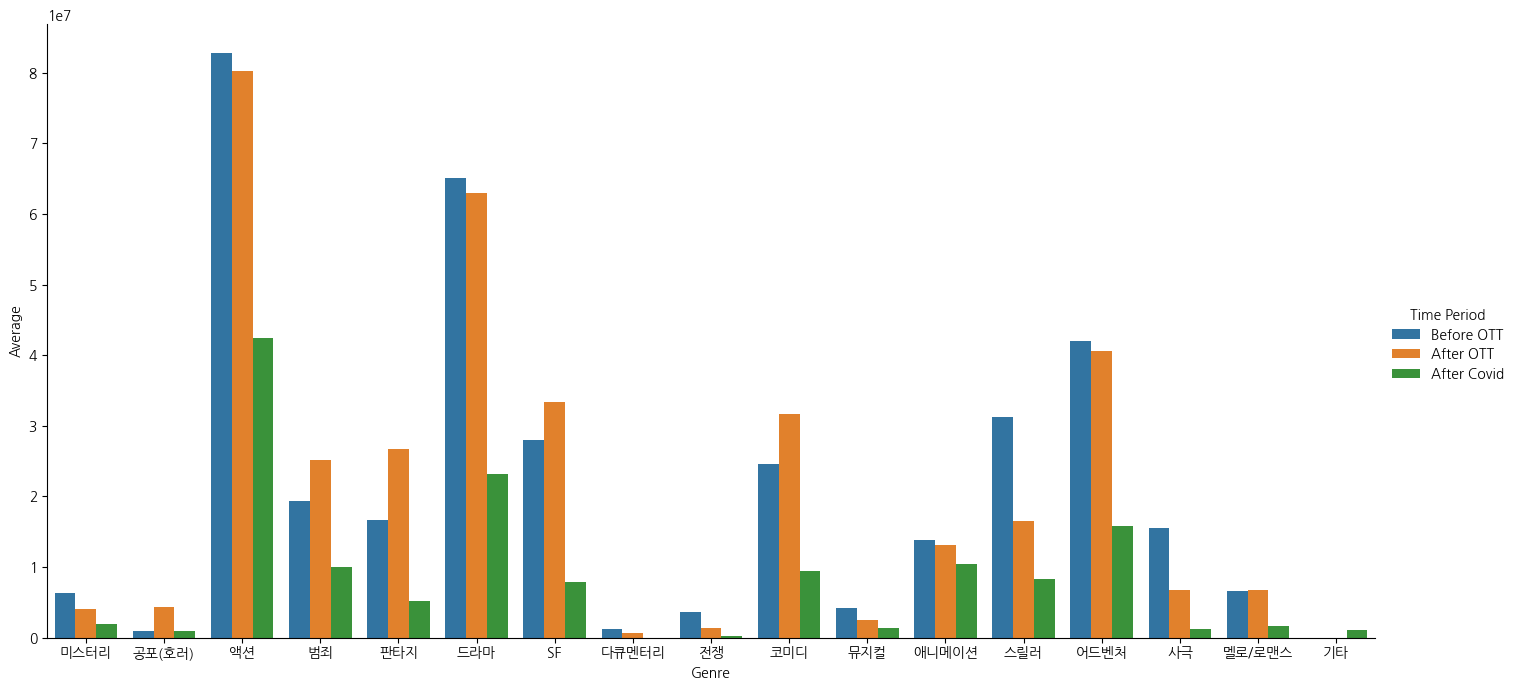

In [498]:
sns.catplot(x="Genre", y="Average", hue="Time Period", data=df_melted, kind="bar", legend=True, height=7, aspect=2)
plt.savefig('bef_aft_each_comparison_aud_bar.png')
plt.show()